# Problem:
Show how to use Newton’s method to compute the cube root
of 5. Numerically carry out the first 10 iterations of Newton’s method, using $x^{(0)} = 1$.
Analytically determine the fixed points of the Newton iteration and determine whether they are attracting or repelling.
If a fixed point is attracting then determine analytically if the convergence is linear or quadratic. 
Draw the “$x^{(k+1)}$ versus $x^{(k)}$ diagram”, again taking $x^{(0)} = 1$, and draw enough iterations in the diagram, so that the long time behavior is clearly visible. For which values of $x^{(0)}$ will Newton’s method converge?


In [458]:
import numpy as np
from numpy import arange, log
from matplotlib import pyplot as plt

Cube root of 5 is a zero of the function $$f(x) = x^{3} - 5$$

In [459]:
def newton_raphson(f, diff, init_x, max_iter=1000):
    x = init_x
    estimates = []
    listX = [x]
    for i in range(max_iter):
        deltaX = -f(x)/diff(x)
        x = x + deltaX
        listX.append(x)
        estimates.append(x)
    return x, listX, estimates

## Define functions and its derivative

In [460]:
# f(x) = x^3 -5
def f(x):
    return pow(x, 3) - 5

# f'(x) = 3*x^2
def diff(x):
    return 3*pow(x, 2)

## Running iteration

In [461]:
init_guess = 1
numOfIteration = 10

finalX, listX, estimates = newton_raphson(f, diff, init_guess, numOfIteration)
for x, xi in zip(listX, estimates):
    print('Xi = ', x)
    print('X(i+1) = ', xi, '\n')

Xi =  1
X(i+1) =  2.333333333333333 

Xi =  2.333333333333333
X(i+1) =  1.8616780045351473 

Xi =  1.8616780045351473
X(i+1) =  1.722001880058607 

Xi =  1.722001880058607
X(i+1) =  1.7100597366002945 

Xi =  1.7100597366002945
X(i+1) =  1.709975950782189 

Xi =  1.709975950782189
X(i+1) =  1.709975946676697 

Xi =  1.709975946676697
X(i+1) =  1.709975946676697 

Xi =  1.709975946676697
X(i+1) =  1.709975946676697 

Xi =  1.709975946676697
X(i+1) =  1.709975946676697 

Xi =  1.709975946676697
X(i+1) =  1.709975946676697 



## Plot iterations

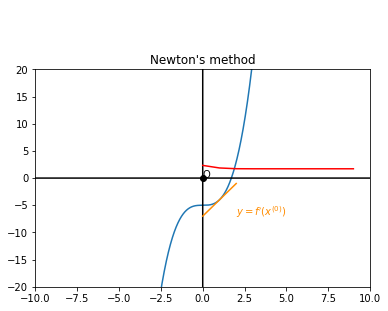

In [462]:
# plotting function
def newton_plot(f, diff, xmin, xmax, ymin, ymax, xi, root=True):
    x = arange(xmin, xmax, 0.01)
    y = arange(ymin, ymax, 0.01)
    vals = np.zeros(x.size)
    # Graph the function
    for i in range(x.size):
        vals[i] = f(x[i])
    plt.plot(x, vals, '-')
    plt.annotate("f(x)", xy=(2.2, 30), color='royalblue')
    
    # Graph x and y axis
    plt.plot(x, np.zeros(x.size), '-', color='black')
    plt.plot(np.zeros(y.size), y, '-', color='black')
    plt.scatter(0, 0, color='black')
    plt.text(0, 0, 'O')

    miny = ymin
    maxy= ymax
    plt.ylim(miny, maxy)
    plt.xlim(xmin, xmax)  

    # Plot tangent line
    plt.plot([xi-1, xi, xi+1], [f(xi)-diff(xi), f(xi), f(xi)+diff(xi)], color='darkorange')
    plt.annotate("$y=f'(x^{(0)})$", xy=(xi+1, f(xi)-3), color='darkorange')

    plt.plot(estimates, color='red')
    return plt

graph = newton_plot(f, diff, -10, 10, -20, 20,
 1)
graph.title("Newton's method")
graph.show()